<a href="https://colab.research.google.com/github/DSLUCIFER/Network-intrusion-detection/blob/main/NIDS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/CS/final(2).csv')

In [6]:
print(data.columns)

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')


In [7]:
print(data.head())

   Time Protcol Flag    Family  Clusters SeddAddress ExpAddress  BTC  USD  \
0    50     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  500   
1    40     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  504   
2    30     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  508   
3    20     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  512   
4    57     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  516   

   Netflow_Bytes IPaddress Threats  Port Prediction  
0              5         A   Bonet  5061         SS  
1              8         A   Bonet  5061         SS  
2              7         A   Bonet  5061         SS  
3             15         A   Bonet  5061         SS  
4              9         A   Bonet  5061         SS  


In [8]:
data.shape

(149043, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [10]:
data.describe()

,Time,Clusters,BTC,USD,Netflow_Bytes,Port
count,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000
mean,21.466979,2.349295,30.554605,14863.441114,2021.278651,5063.949967
std,15.883598,2.828759,101.447102,26849.434659,2271.420987,2.696011
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


<Axes: >

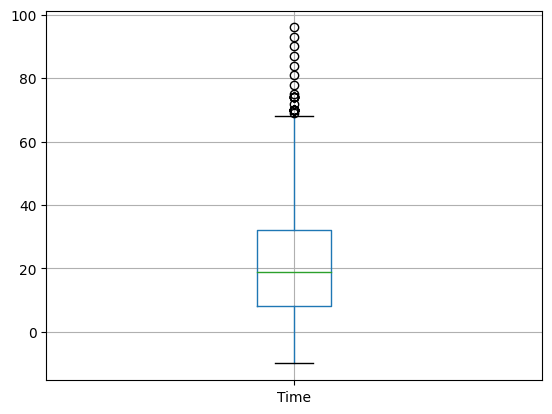

In [11]:
data.boxplot(column='Time')

<Axes: >

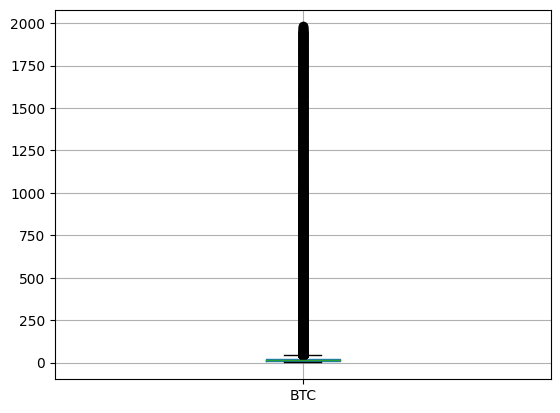

In [12]:
data.boxplot(column='BTC')

<Axes: >

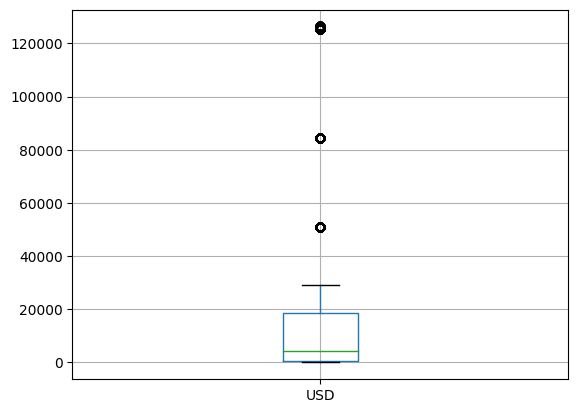

In [13]:
data.boxplot(column='USD')

<Axes: >

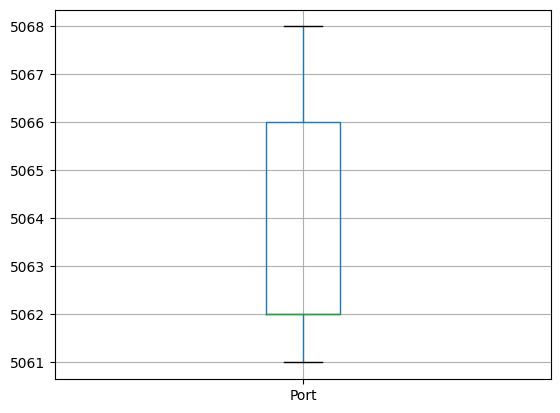

In [14]:
data.boxplot(column='Port')

<Axes: >

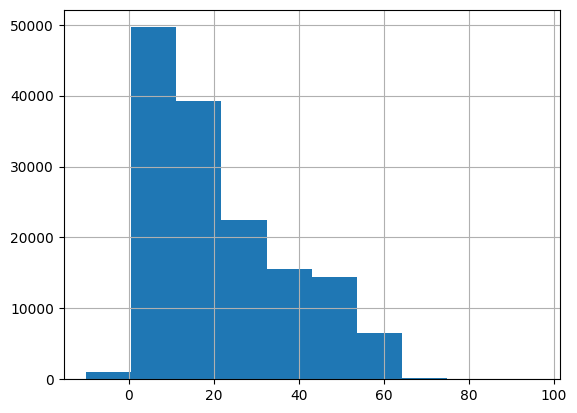

In [15]:
data['Time'].hist()

<Axes: >

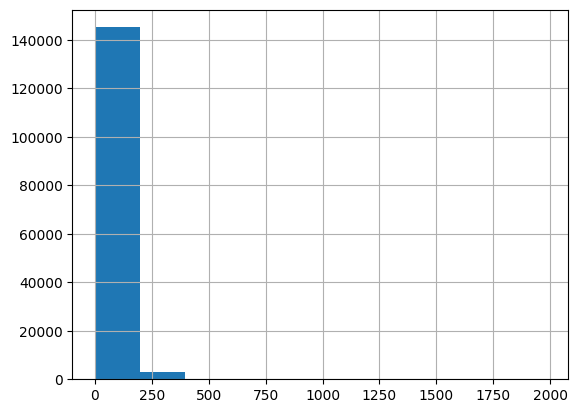

In [16]:
data['BTC'].hist()

<Axes: >

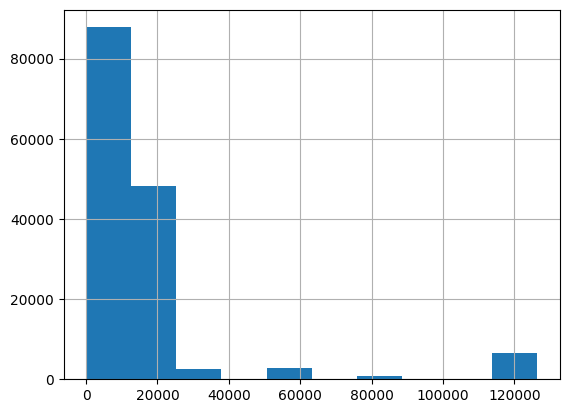

In [17]:
data['USD'].hist()

<Axes: >

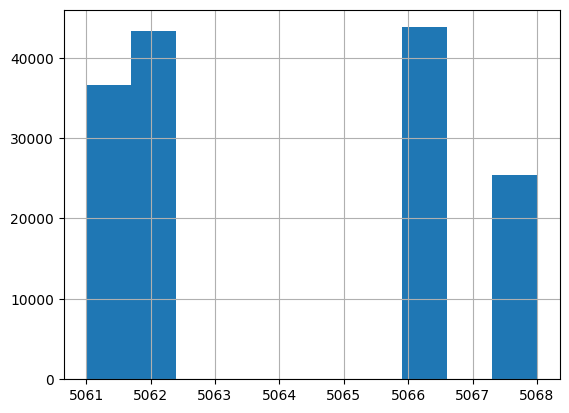

In [18]:
data['Port'].hist()

In [19]:
# Identify categorical variables
categorical_cols = ['Protcol', 'Flag', 'Family', 'Threats']

In [20]:
X_categorical = pd.get_dummies(data[categorical_cols])
y_categorical = pd.get_dummies(data[categorical_cols])

In [21]:
# Numerical features
numerical_cols = ['Time', 'Clusters', 'BTC', 'USD', 'Netflow_Bytes', 'Port']  # Assuming these are numerical columns
X_numerical = data[numerical_cols]
y_numerical = data[numerical_cols]

In [22]:
# Concatenate one-hot encoded features with numerical features
X = pd.concat([X_categorical, X_numerical], axis=1)
y = pd.concat([y_categorical, y_numerical], axis=1)

In [23]:
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [24]:
print(X_normalized)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.94847204e-03
  3.23650781e-04 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.98012312e-03
  5.66388866e-04 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 4.01177420e-03
  4.85476171e-04 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.26683442e-02
  2.71947569e-01 1.42857143e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.27158208e-02
  2.72837608e-01 1.42857143e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.27632974e-02
  2.73727648e-01 1.42857143e-01]]


In [25]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Concatenate features and target variable for training set
train_data = pd.concat([X_train, y_train], axis=1)

# Save training data to a CSV file
train_data.to_csv('/content/drive/MyDrive/CS/test_data.csv', index=False)

# Concatenate features and target variable for testing set
test_data = pd.concat([X_test, y_test], axis=1)

# Save testing data to a CSV file
test_data.to_csv('/content/drive/MyDrive/CS/test_data.csv', index=False)


In [27]:
train=pd.read_csv('/content/drive/MyDrive/CS/test_data.csv')

In [28]:
test=pd.read_csv('/content/drive/MyDrive/CS/test_data.csv')

In [29]:
y_train.shape

(119234, 44)

In [30]:
X_train.shape

(119234, 44)

In [31]:
print(X_train.head())
print(y_train.head())

        Protcol_ICMP  Protcol_TCP  Protcol_UDP  Flag_A  Flag_AF  Flag_AP  \
46958              0            0            1       0        0        0   
137951             0            1            0       0        1        0   
39746              0            0            1       0        1        0   
144462             0            0            1       0        0        0   
79287              0            1            0       0        0        0   

        Flag_APRSF  Flag_APS  Flag_APSF  Flag_ARF  ...  Threats_SSH  \
46958            0         0          0         1  ...            0   
137951           0         0          0         0  ...            0   
39746            0         0          0         0  ...            0   
144462           0         0          0         0  ...            1   
79287            0         0          0         0  ...            0   

        Threats_Scan  Threats_Spam  Threats_UDP Scan  Time  Clusters  BTC  \
46958              0             0     

<Axes: xlabel='Prediction', ylabel='count'>

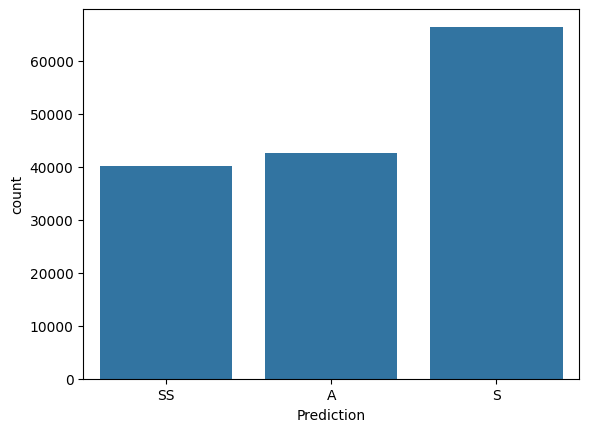

In [32]:
sns.countplot(x='Prediction', data=data)

<Axes: xlabel='Threats', ylabel='count'>

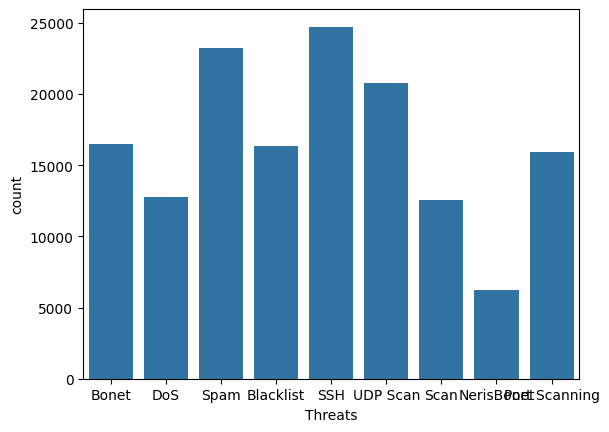

In [33]:
sns.countplot(x='Threats', data=data
            )

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)